In [3]:
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd()
# Locate repo root so imports from src work even if notebook moves
while PROJECT_ROOT != PROJECT_ROOT.parent and not (PROJECT_ROOT / 'src').exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

if not (PROJECT_ROOT / 'src').exists():
    raise RuntimeError("Could not locate 'src' directory relative to this notebook")

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))



──────────────────────────────
Optimal weight vector found for 'bursty' | cost='weighted'
Objective value: 1408.5985
w* (rounded): [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Sum(w*): 1.0000
──────────────────────────────


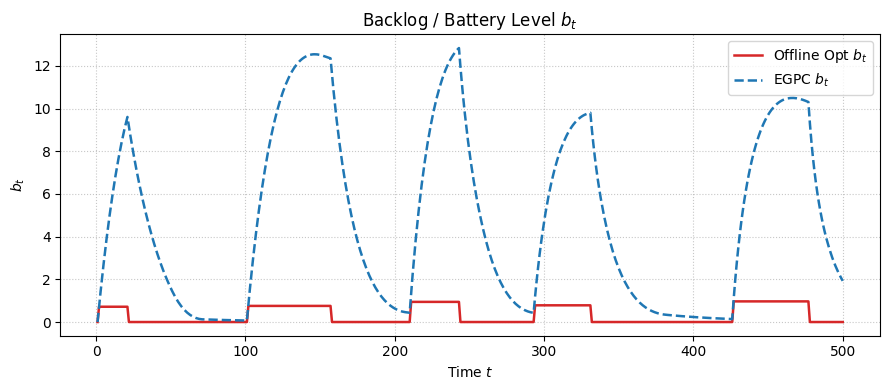

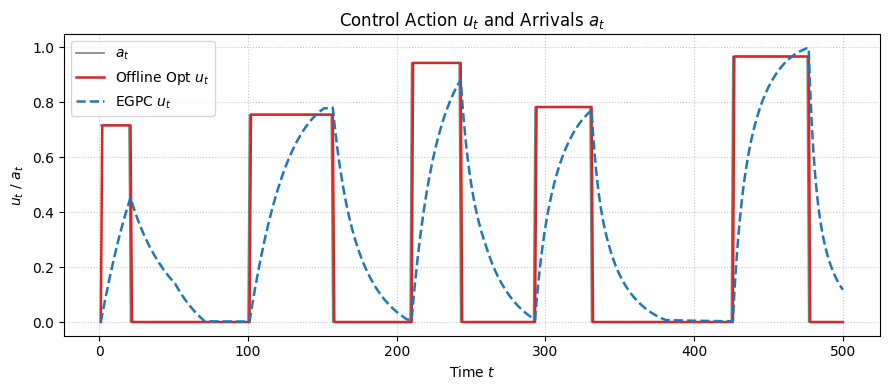

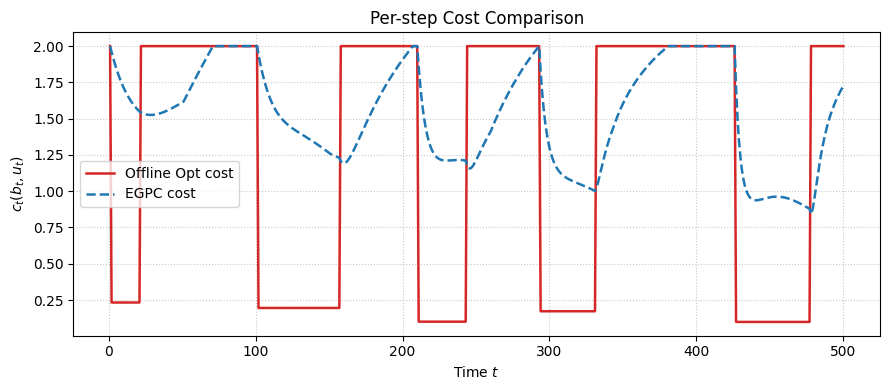


──────────────────────────────
Offline Opt     Total cost: 1408.5985
EGPC            Total cost: 1567.3837
──────────────────────────────


{'total_cost_1': np.float64(1408.5985337566603),
 'total_cost_2': np.float64(1567.3836598892494),
 'b_diff': np.float64(4.530773608825064),
 'u_diff': np.float64(0.19802279139433335),
 'cost_diff': np.float64(0.62438931436792)}

In [ ]:
from src.offline_opt import solve_optimal_w
from src.simulate_storage_dynamics import simulate_storage_dynamics
from src.egpc import run_egpc
from src.plots import compare_controllers

import numpy as np


# Example usage

T = 1000
H = 50
kappa = 0.02

opt_data = solve_optimal_w(a_mode="bursty", cost_key="weighted", H=H, T=T)
opt_sim = simulate_storage_dynamics(
    opt_data["Phi"],
    opt_data["Psi"],
    opt_data["a"],
    opt_data["w_star"],
    cost_fn=opt_data["cost_fn"],
    cost_kwargs=opt_data["cost_kwargs"],
)


egpc_result = run_egpc(
    a_mode="bursty",
    cost_key="weighted",
    eta = np.sqrt(np.log(H)/T/(1/2 + 1/kappa)),
    H=H,
    T=T,
    kappa = kappa,
    cost_kwargs=opt_data["cost_kwargs"],
)

compare_controllers(opt_sim, "Offline Opt", egpc_result, "EGPC", a=opt_data["a"])
